In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
vacmotdesc = pd.read_csv('vacation_complete_dataset.csv')

# Display the column names
print(vacmotdesc.columns)

# Display the first few rows of the dataset
print(vacmotdesc.head())

# Get basic information about the dataset
print(vacmotdesc.info())

Index(['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation',
       'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP',
       'Vacation.Behaviour', 'rest and relax', 'luxury / be spoilt',
       'do sports', 'excitement, a challenge', 'not exceed planned budget',
       'realise creativity', 'fun and entertainment', 'good company',
       'health and beauty', 'free-and-easy-going', 'entertainment facilities',
       'not care about prices', 'life style of the local people',
       'intense experience of nature', 'cosiness/familiar atmosphere',
       'maintain unspoilt surroundings', 'everything organised',
       'unspoilt nature/natural landscape', 'cultural offers',
       'change of surroundings'],
      dtype='object')
   Gender  Age  Education                Income  Income2  \
0  Female   25        6.0    $30,001 to $60,000   30-60k   
1  Female   31        8.0  $120,001 to $150,000    >120k   
2    Male   21        3.0   $90,001 to $120,000  90-120k  

Gender
Female    488
Male      512
Name: count, dtype: int64
Gender  Female  Male  Total
Gender                     
Female     488     0    488
Male         0   512    512
Total      488   512   1000


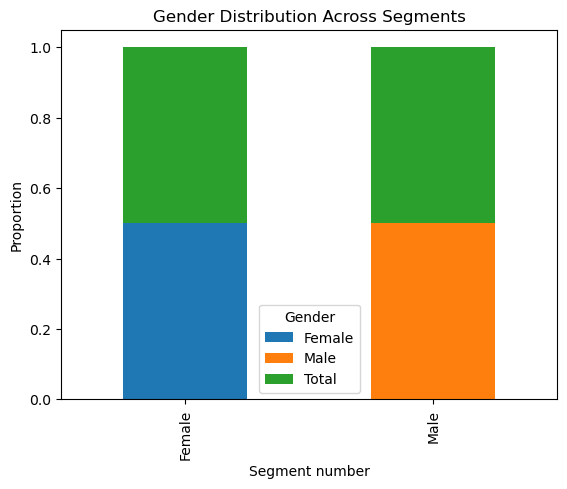

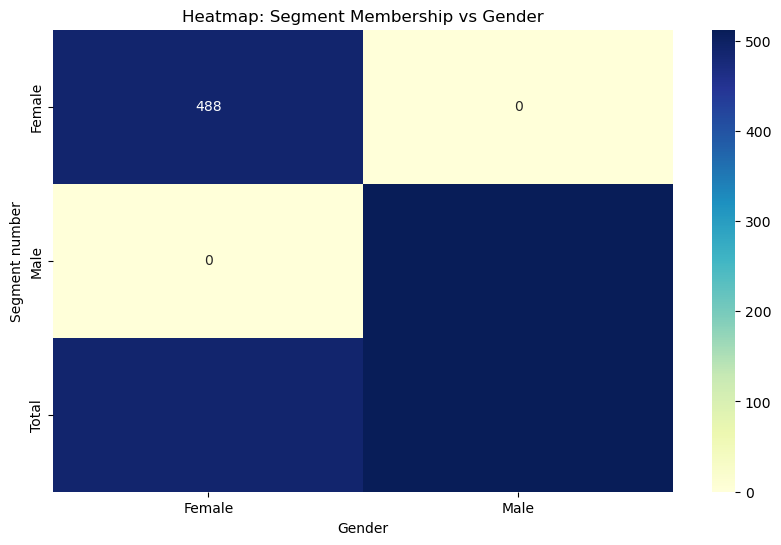

In [33]:
# Add segment membership as a categorical variable
vacmotdesc['Gender'] = pd.Categorical(vacmotdesc['Gender'])

# Get segment sizes
segment_sizes = vacmotdesc['Gender'].value_counts().sort_index()
print(segment_sizes)

# Create cross-tabulation with Gender (assuming you have a 'Gender' column)
Segment_Gender = pd.crosstab(vacmotdesc['Gender'], vacmotdesc['Gender'], margins=True, margins_name="Total")
print(Segment_Gender)

# Visualize the cross-tabulation with a stacked bar chart
Segment_Gender_pct = Segment_Gender.div(Segment_Gender.sum(axis=1), axis=0)
Segment_Gender_pct.drop('Total', axis=0).plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Segments')
plt.xlabel('Segment number')
plt.ylabel('Proportion')
plt.legend(title='Gender')
plt.show()

# Create a heatmap (as an alternative to mosaic plot)
plt.figure(figsize=(10, 6))
sns.heatmap(Segment_Gender.drop('Total', axis=1), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Segment Membership vs Gender')
plt.xlabel('Gender')
plt.ylabel('Segment number')
plt.show()

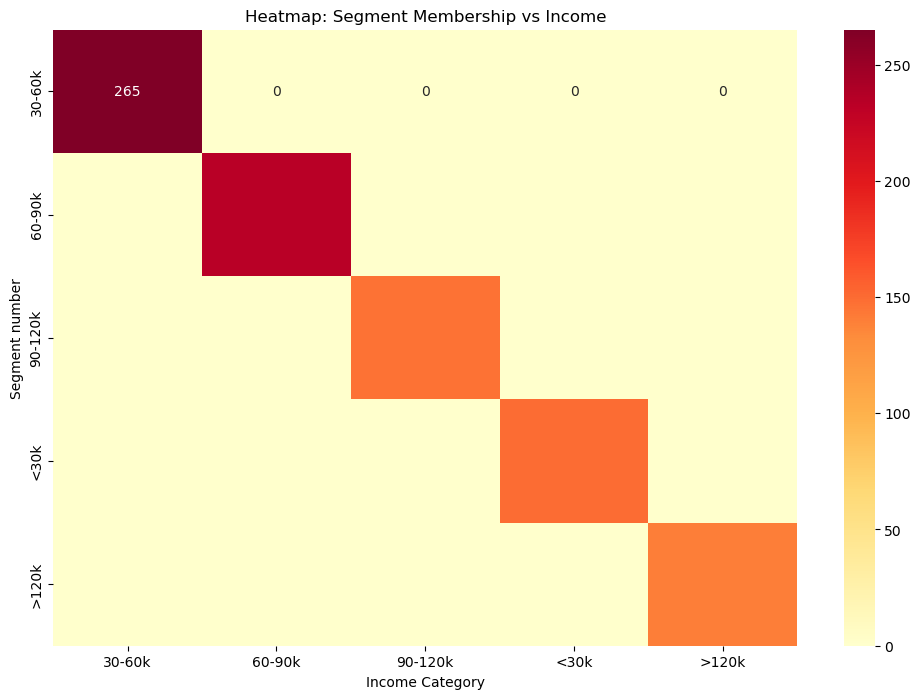

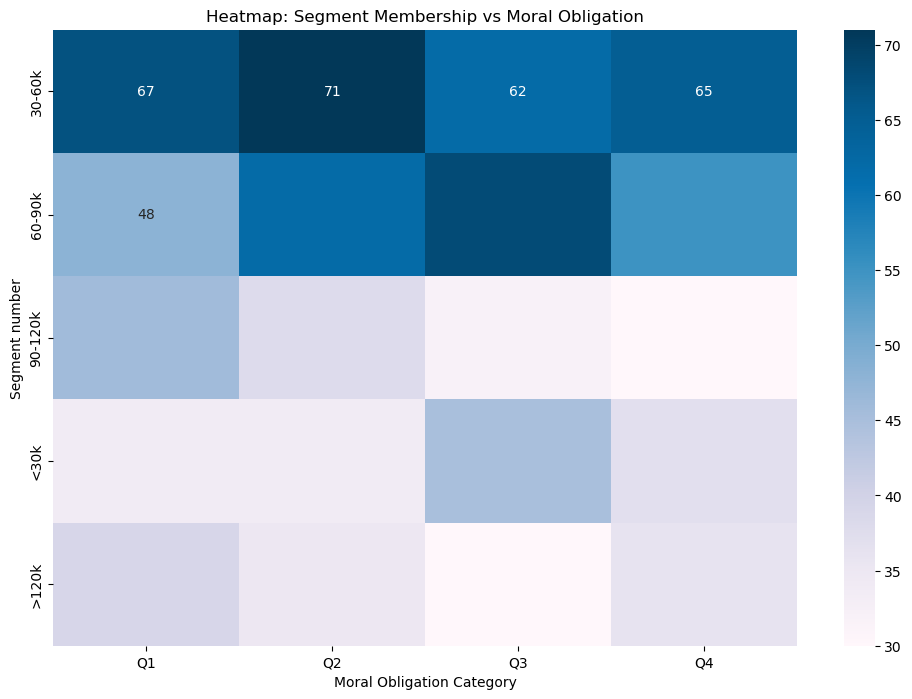

In [41]:
# For income (adjust 'Income' to match your actual column name)
Segment_Income = pd.crosstab(vacmotdesc['Income2'], vacmotdesc['Income2'])
plt.figure(figsize=(12, 8))
sns.heatmap(Segment_Income, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap: Segment Membership vs Income')
plt.xlabel('Income Category')
plt.ylabel('Segment number')
plt.show()

# For moral obligation (adjust 'Obligation' to match your actual column name)
# First, we need to create the 'Obligation2' variable
vacmotdesc['Obligation2'] = pd.qcut(vacmotdesc['Obligation'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

Segment_Obligation = pd.crosstab(vacmotdesc['Income2'], vacmotdesc['Obligation2'])
plt.figure(figsize=(12, 8))
sns.heatmap(Segment_Obligation, annot=True, fmt='d', cmap='PuBu')
plt.title('Heatmap: Segment Membership vs Moral Obligation')
plt.xlabel('Moral Obligation Category')
plt.ylabel('Segment number')
plt.show()

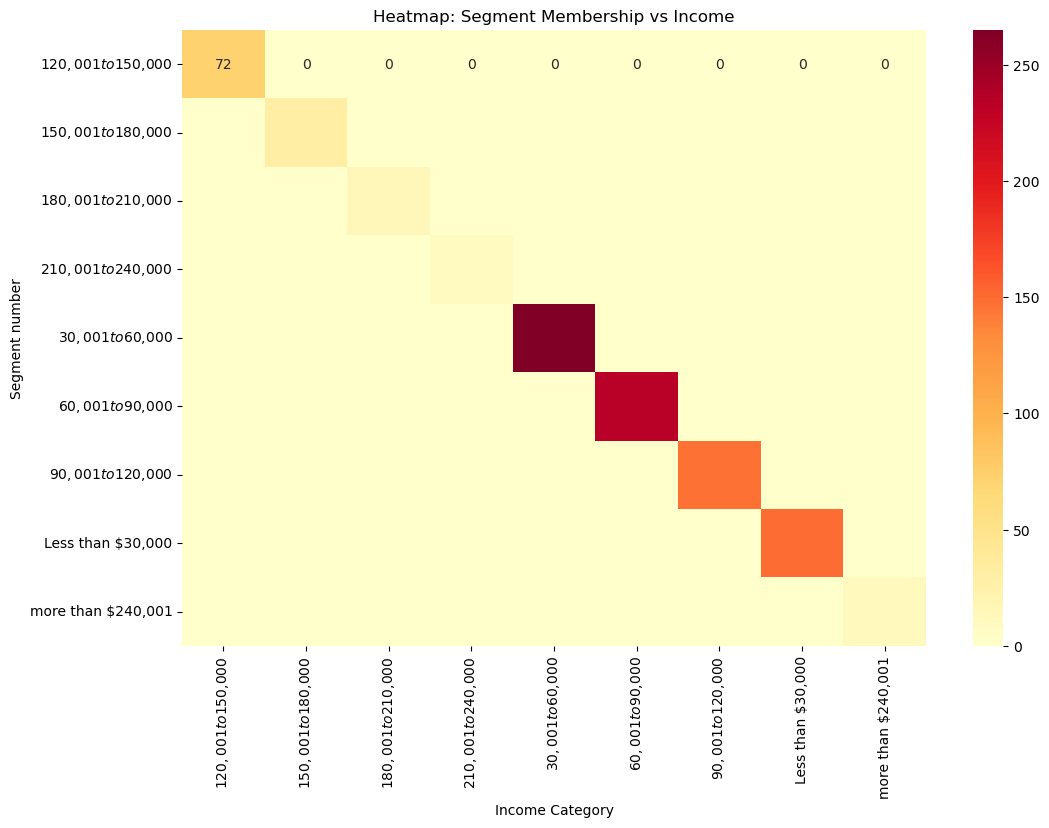

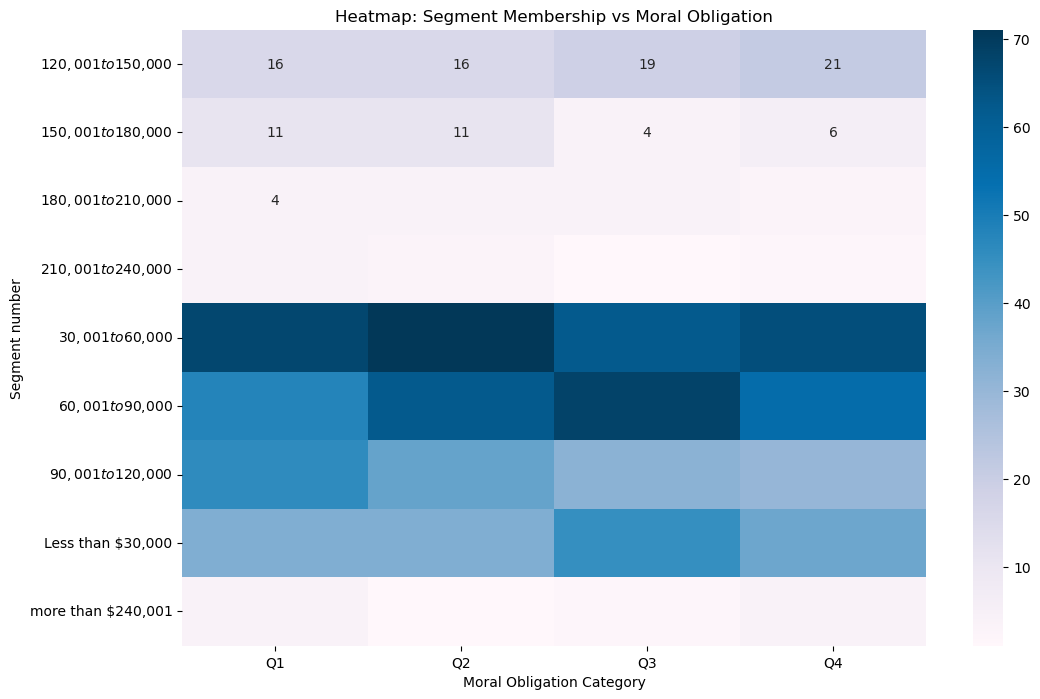

In [37]:
# For income (adjust 'Income' to match your actual column name)
Segment_Income = pd.crosstab(vacmotdesc['Income'], vacmotdesc['Income'])
plt.figure(figsize=(12, 8))
sns.heatmap(Segment_Income, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap: Segment Membership vs Income')
plt.xlabel('Income Category')
plt.ylabel('Segment number')
plt.show()

# For moral obligation (adjust 'Obligation' to match your actual column name)
# First, we need to create the 'Obligation2' variable
vacmotdesc['Obligation2'] = pd.qcut(vacmotdesc['Obligation'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

Segment_Obligation = pd.crosstab(vacmotdesc['Income'], vacmotdesc['Obligation2'])
plt.figure(figsize=(12, 8))
sns.heatmap(Segment_Obligation, annot=True, fmt='d', cmap='PuBu')
plt.title('Heatmap: Segment Membership vs Moral Obligation')
plt.xlabel('Moral Obligation Category')
plt.ylabel('Segment number')
plt.show()

In [38]:
chi2, p, dof, expected = stats.chi2_contingency(Segment_Gender.drop('Total', axis=0).drop('Total', axis=1))
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")

Chi-square statistic: 996.0016992841155
p-value: 1.3284771543845413e-218


In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv('vacmotdescriptor_variables.csv')

# Display column names and the first few rows
print(df.columns)
print(df.head())


Index(['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation',
       'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP',
       'Vacation.Behaviour'],
      dtype='object')
   Gender  Age  Education                Income  Income2  \
0  Female   25        6.0    $30,001 to $60,000   30-60k   
1  Female   31        8.0  $120,001 to $150,000    >120k   
2    Male   21        3.0   $90,001 to $120,000  90-120k   
3  Female   18        2.0    $30,001 to $60,000   30-60k   
4    Male   61        3.0     Less than $30,000     <30k   

                   Occupation State Relationship.Status  Obligation  \
0  Clerical or service worker   VIC              single    4.800000   
1                professional    WA             married    3.300000   
2                         NaN   NSW              single    3.400000   
3                  unemployed   NSW              single    2.633333   
4                     retired    WA             married    3.400000   

  Obligation2

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


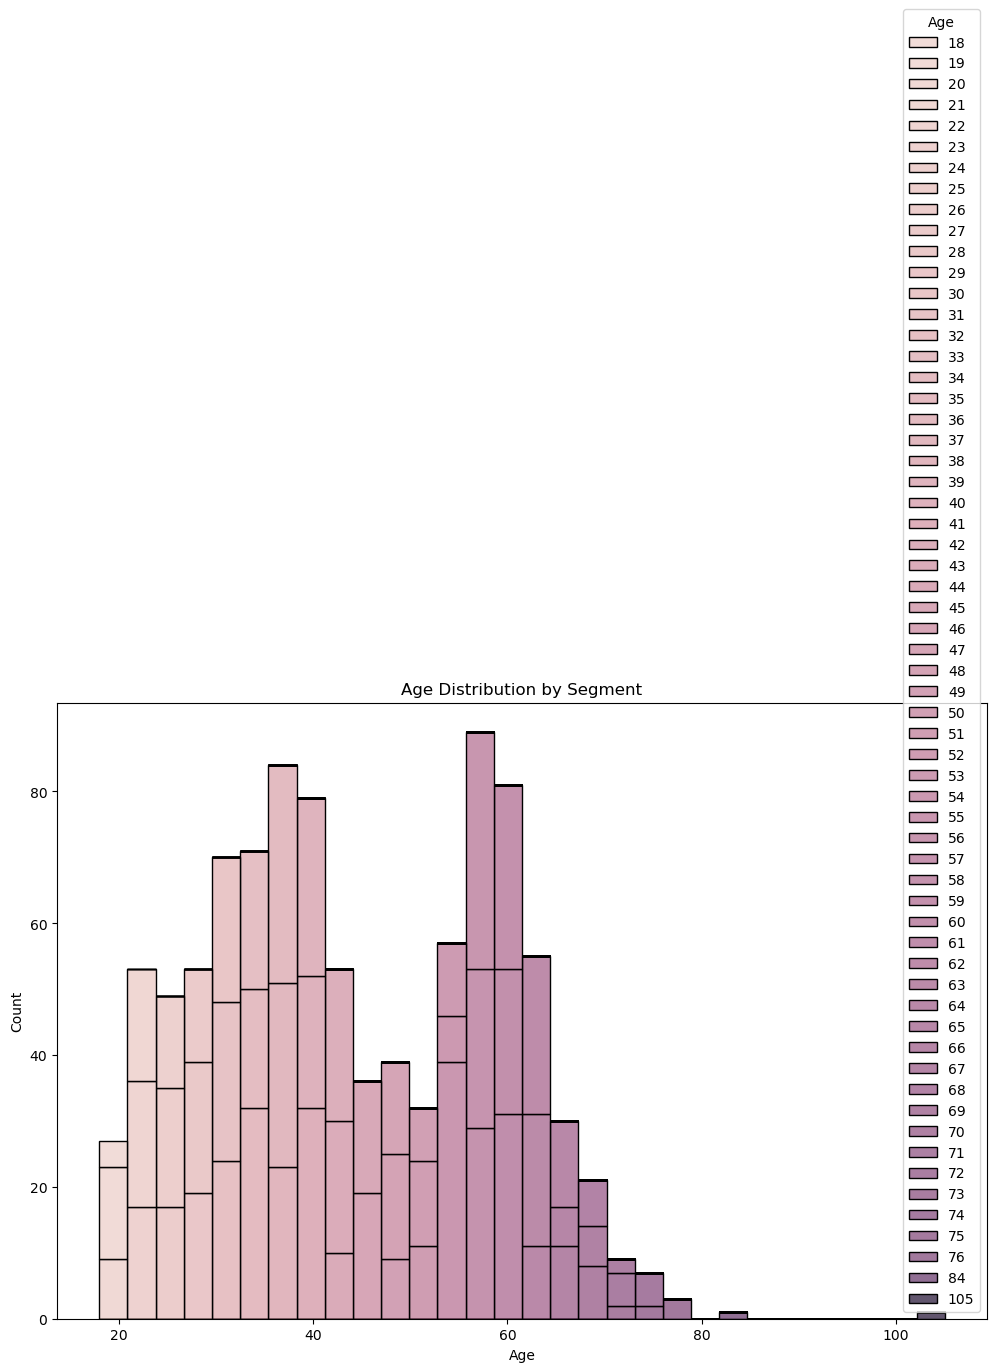

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


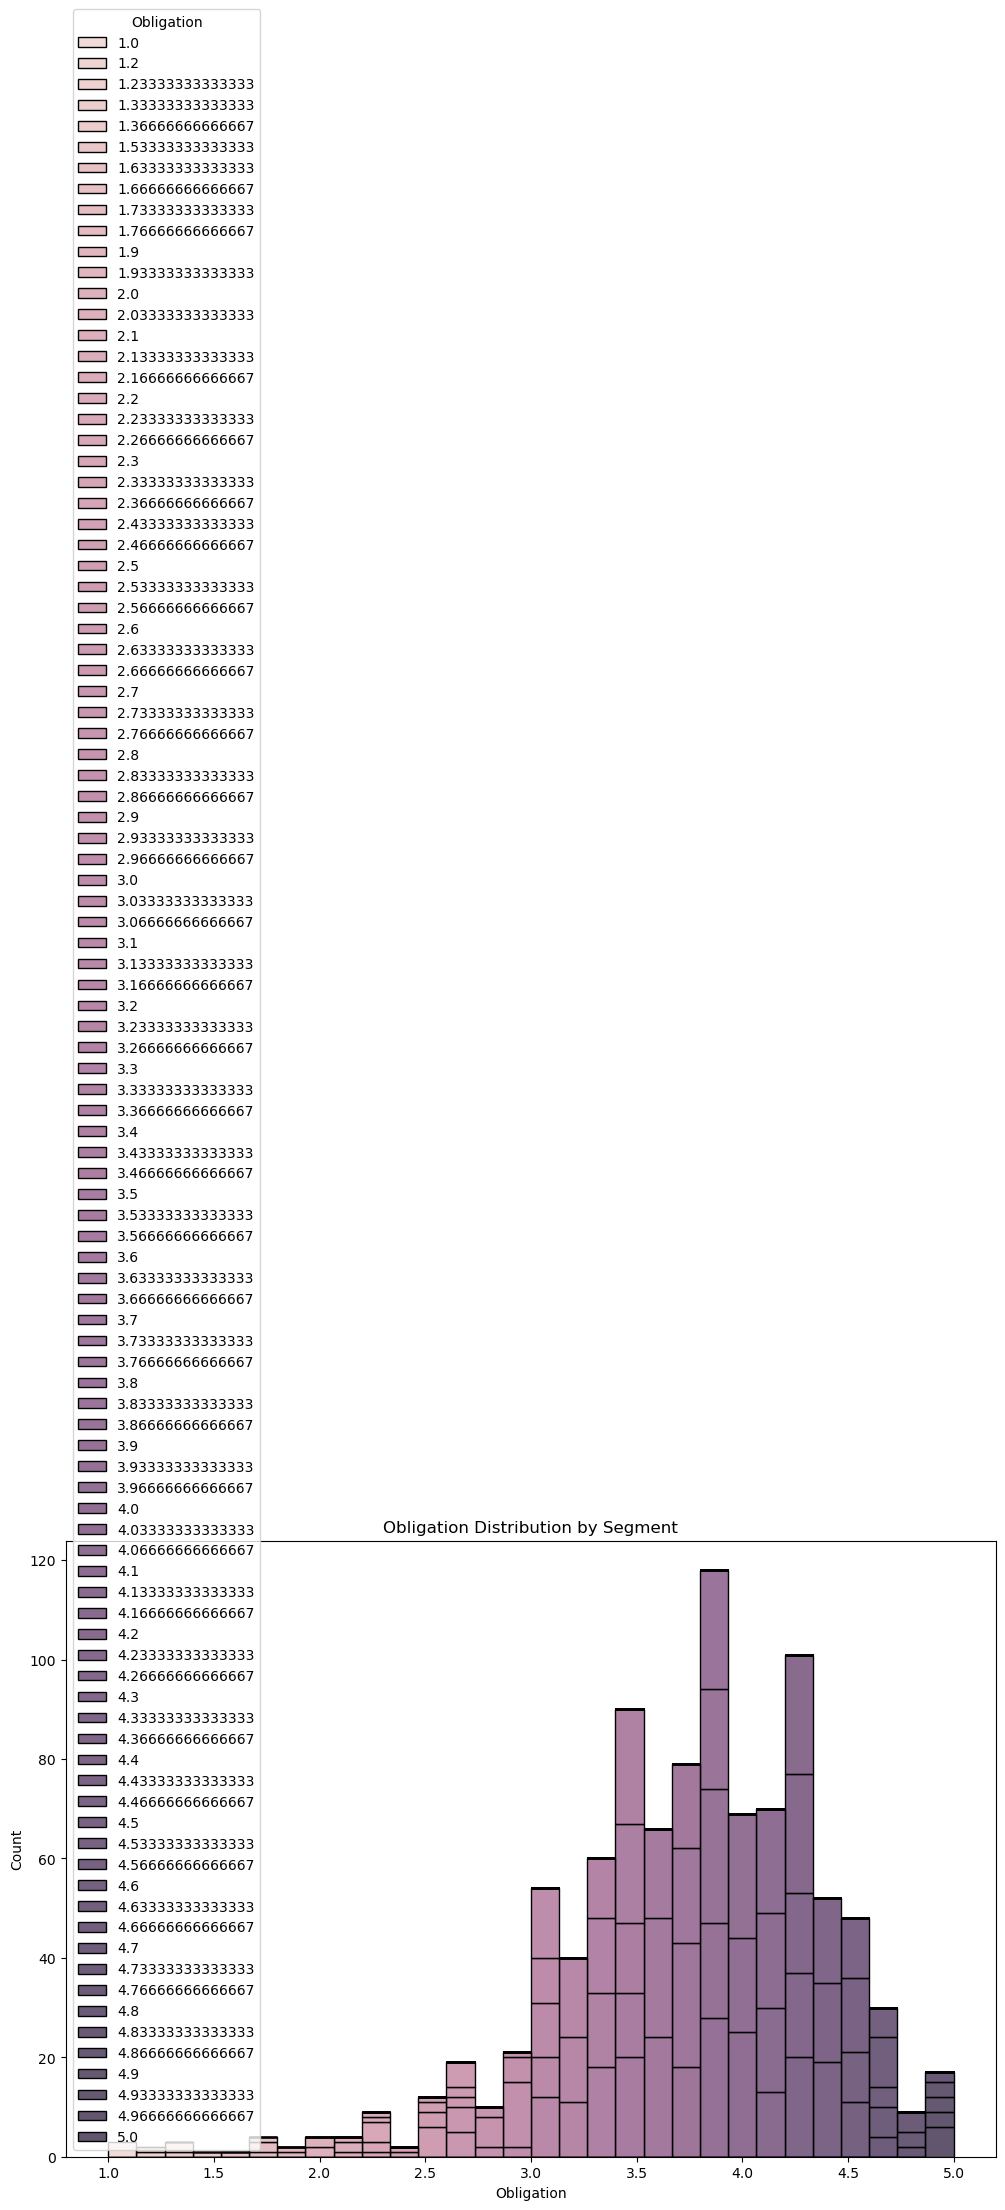

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age by Segment
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Age', multiple='stack', bins=30)
plt.title('Age Distribution by Segment')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram for Obligation by Segment
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Obligation', hue='Obligation', multiple='stack', bins=30)
plt.title('Obligation Distribution by Segment')
plt.xlabel('Obligation')
plt.ylabel('Count')
plt.show()


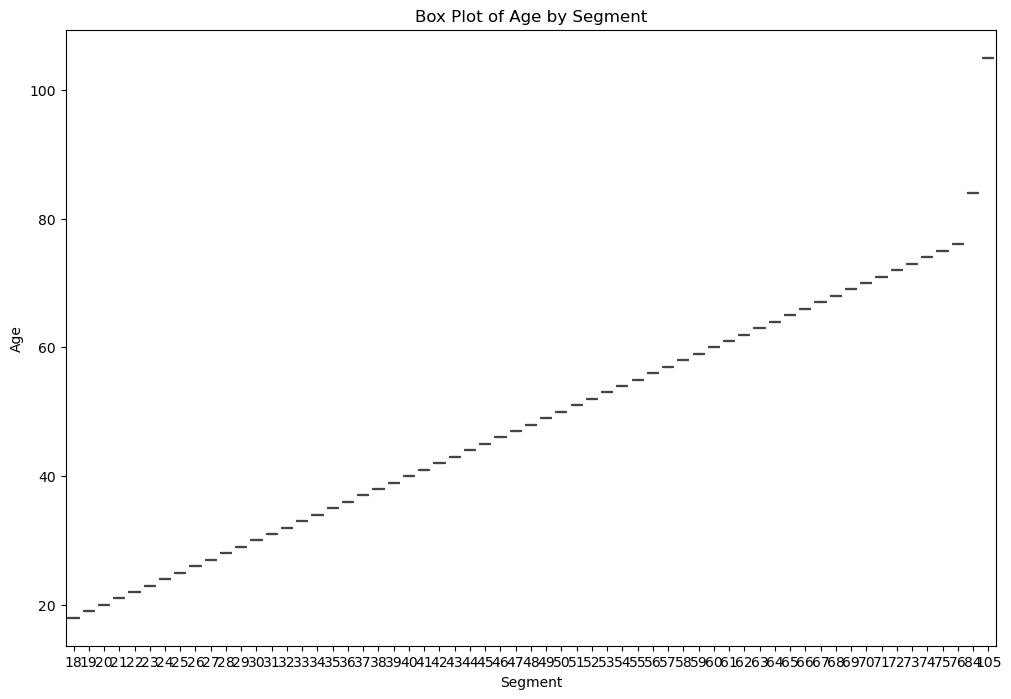

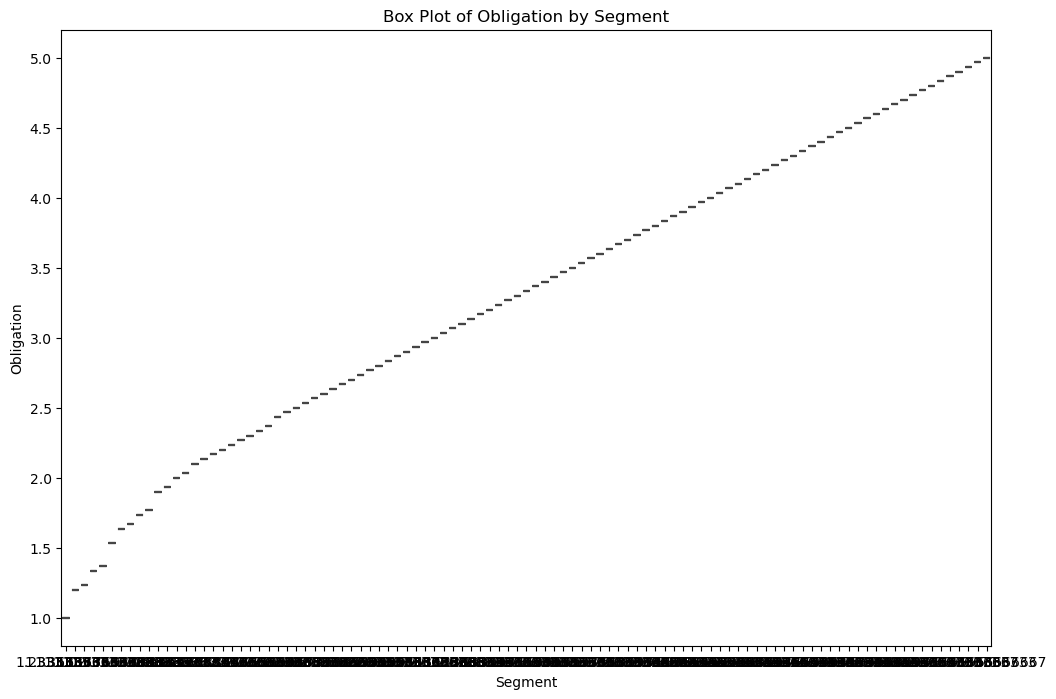

In [47]:
# Box plot for Age by Segment
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Age', y='Age')
plt.title('Box Plot of Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

# Box plot for Obligation by Segment
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Obligation', y='Obligation')
plt.title('Box Plot of Obligation by Segment')
plt.xlabel('Segment')
plt.ylabel('Obligation')
plt.show()


In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for Age by Segment
model_age = ols('Age ~ C(Age)', data=df).fit()
anova_age = sm.stats.anova_lm(model_age, typ=2)
print('ANOVA for Age by Segment')
print(anova_age)

# ANOVA for Obligation by Segment
model_obligation = ols('Obligation ~ C(Obligation)', data=df).fit()
anova_obligation = sm.stats.anova_lm(model_obligation, typ=2)
print('ANOVA for Obligation by Segment')
print(anova_obligation)


ANOVA for Age by Segment
                sum_sq     df             F  PR(>F)
C(Age)    2.111778e+05   60.0  5.022051e+29     0.0
Residual  6.580842e-24  939.0           NaN     NaN
ANOVA for Obligation by Segment
                     sum_sq     df             F  PR(>F)
C(Obligation)  4.038079e+02  100.0  3.326864e+28     0.0
Residual       1.091188e-25  899.0           NaN     NaN
